# Clasificación de Cantos de Ballenas 🐋
Proyecto de aprendizaje supervisado usando el dataset **Marine Ocean Mammal Sound Dataset** (Hugging Face).

**Objetivo:** Explorar y preparar el dataset para un modelo de clasificación automática de cantos de ballenas y otros mamíferos marinos.


Dataset cargado: ardavey/marine_ocean_mammal_sound
Número de muestras en el split 'train': 1357
Columnas disponibles: ['audio', 'species', 'label']


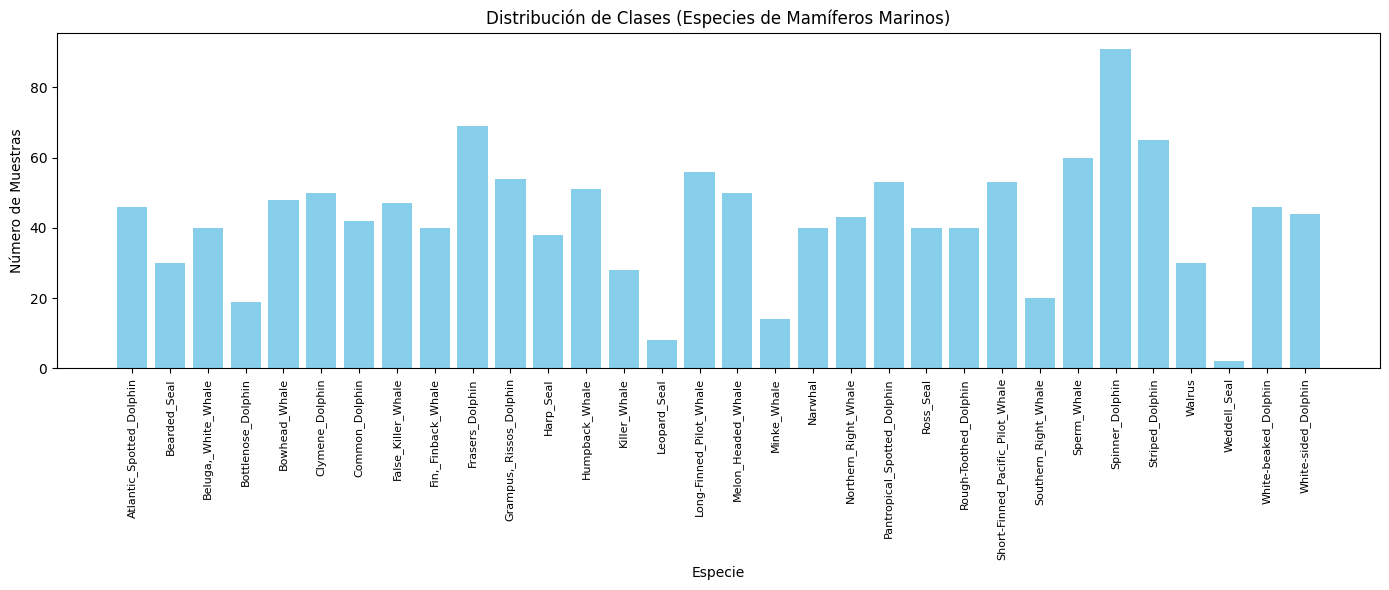

RuntimeError: Could not load libtorchcodec. Likely causes:
          1. FFmpeg is not properly installed in your environment. We support
             versions 4, 5, 6, and 7 on all platforms, and 8 on Mac and Linux.
          2. The PyTorch version (2.9.0+cpu) is not compatible with
             this version of TorchCodec. Refer to the version compatibility
             table:
             https://github.com/pytorch/torchcodec?tab=readme-ov-file#installing-torchcodec.
          3. Another runtime dependency; see exceptions below.
        The following exceptions were raised as we tried to load libtorchcodec:
        
[start of libtorchcodec loading traceback]
FFmpeg version 8: Could not load this library: C:\Users\benja\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchcodec\libtorchcodec_core8.dll
FFmpeg version 7: Could not load this library: C:\Users\benja\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchcodec\libtorchcodec_core7.dll
FFmpeg version 6: Could not load this library: C:\Users\benja\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchcodec\libtorchcodec_core6.dll
FFmpeg version 5: Could not load this library: C:\Users\benja\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchcodec\libtorchcodec_core5.dll
FFmpeg version 4: Could not load this library: C:\Users\benja\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchcodec\libtorchcodec_core4.dll
[end of libtorchcodec loading traceback].

In [3]:
# ==============================================================================
# 1. INSTALACIÓN E IMPORTACIÓN DE LIBRERÍAS
# ==============================================================================
# Puedes necesitar instalar estos paquetes si usas un nuevo entorno:
# pip install datasets librosa numpy matplotlib

from datasets import load_dataset, Audio
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

# ==============================================================================
# 2. CARGA DEL DATASET
# ==============================================================================

# Nombre del dataset en Hugging Face
DATASET_NAME = "ardavey/marine_ocean_mammal_sound"

# Carga la división 'train' del dataset
# Nota: La librería datasets tiene utilidades para cargar el audio.
dataset = load_dataset(DATASET_NAME, split='train')

print(f"Dataset cargado: {DATASET_NAME}")
print(f"Número de muestras en el split 'train': {len(dataset)}")
print(f"Columnas disponibles: {dataset.column_names}")

# Es importante estandarizar la frecuencia de muestreo (SR) si el modelo lo requiere.
# La mayoría de los modelos de audio usan 16000 Hz.
TARGET_SAMPLING_RATE = 16000
dataset = dataset.cast_column("audio", Audio(sampling_rate=TARGET_SAMPLING_RATE))

# ==============================================================================
# 3. ANÁLISIS EXPLORATORIO: DISTRIBUCIÓN DE CLASES
# ==============================================================================

# Mapear las etiquetas numéricas a nombres de especies
label_names = dataset.features["label"].names
labels = [label_names[label] for label in dataset["label"]]
unique_labels, counts = np.unique(labels, return_counts=True)

# Visualizar la distribución de clases
plt.figure(figsize=(14, 6))
plt.bar(unique_labels, counts, color='skyblue')
plt.xticks(rotation=90, fontsize=8)
plt.title('Distribución de Clases (Especies de Mamíferos Marinos)')
plt.xlabel('Especie')
plt.ylabel('Número de Muestras')
plt.tight_layout()
plt.show()

# ==============================================================================
# 4. VISUALIZACIÓN DE UNA MUESTRA DE AUDIO Y SU ESPECTROGRAMA MEL (MODIFICADO)
# ==============================================================================

# Tomar un ejemplo (ejemplo en el índice 42)
sample_idx = 42
sample = dataset[sample_idx]
label_names = dataset.features["label"].names # Asegurar que label_names esté disponible
label = label_names[sample["label"]]

# **NUEVO: Usamos la ruta del archivo y librosa.load para cargar el audio**
# Esto suele ser más robusto si las dependencias de datasets fallan.
audio_file_path = sample["audio"]["path"]
sampling_rate = sample["audio"]["sampling_rate"] # Tomar el SR que configuramos (16000 Hz)

print(f"\n--- Analizando la muestra de: {label} ---")
print(f"Ruta del archivo: {audio_file_path}")
print(f"Frecuencia de muestreo (SR): {sampling_rate} Hz")

try:
    # Cargar el audio usando librosa.load con el SR deseado
    audio_array, sr = librosa.load(audio_file_path, sr=sampling_rate)
except Exception as e:
    print(f"Error al cargar el archivo con librosa: {e}")
    print("Asegúrese de que el archivo existe en esa ruta o que el dataset lo descargó correctamente.")
    raise

# Verificar el audio cargado y escucharlo
ipd.display(ipd.Audio(audio_array, rate=sr)) # Para escuchar el audio en el notebook

# --- A. Forma de Onda (Dominio del Tiempo) ---
plt.figure(figsize=(14, 4))
librosa.display.waveshow(audio_array, sr=sr)
plt.title(f'Forma de Onda: {label}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

# --- B. Espectrograma Mel (Dominio de la Frecuencia-Tiempo) ---

# 1. Calcular el Espectrograma Mel
N_MELS = 128
mel_spectrogram = librosa.feature.melspectrogram(
    y=audio_array,
    sr=sr,
    n_mels=N_MELS
)

# 2. Convertir a escala de Decibelios (dB)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# 3. Visualizar el Espectrograma Mel
plt.figure(figsize=(10, 6))
librosa.display.specshow(
    mel_spectrogram_db,
    x_axis='time',
    y_axis='mel',
    sr=sr
)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Espectrograma Mel: {label} ({N_MELS} Mel Bins)')
plt.tight_layout()
plt.show()

# La matriz mel_spectrogram_db es la representación que usarás como "imagen" de entrada para tu CNN.
print(f"\nDimensiones de la matriz Mel Spectrogram (entrada para la CNN): {mel_spectrogram_db.shape}")

## Revisión del contenido del dataset


## Visualización de un ejemplo de audio y su espectrograma
